In [1]:
import autograd.numpy as np

from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt

from soft_tree_model import soft_tree

In [2]:
np.random.seed(41)

In [3]:
data = load_iris()
X = data['data']
Y = data['target']

y = np.zeros((Y.shape[0],3))
y[:,0] = (Y==0).astype(int)
y[:,1] = (Y==1).astype(int)
y[:,2] = (Y==2).astype(int)

X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = X - X_mean
X = X / X_std

idx_test = np.zeros((150))
idx_test[:30] = 1
np.random.shuffle(idx_test)

X_test = X[idx_test.astype(bool)]
X_train = X[np.logical_not(idx_test.astype(bool))]

y_test = y[idx_test.astype(bool)]
y_train = y[np.logical_not(idx_test.astype(bool))]

WARNING - Loss not decreasing at iter: 379

WARNING - Potential convergence issues


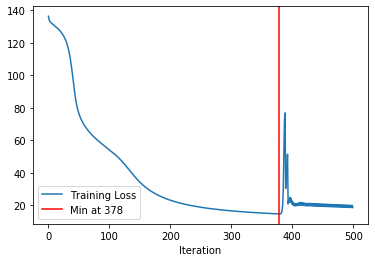

In [4]:
tree_model = soft_tree(tree_depth = 3)
tree_model.train(X_train,y_train,500)

In [5]:
tree_model.params

[array([[-3.04655047,  2.76430156, -4.94350868, -5.57314502],
        [ 1.60042671, -2.68833434, -0.31118258, -0.36556522]]),
 array([[ 2.43136215,  2.63074929,  3.13353251,  6.89983795],
        [-2.34285582, -2.98091125, -0.86529265,  0.61799934]]),
 array([[ 0.26882886,  0.94404331,  1.96109987,  1.02972804],
        [ 0.80120729,  1.48711897,  0.68955467, -0.43014481]]),
 array([-2.30067544,  4.05257534, -0.7518999 ]),
 array([-1.70667201, -1.37588635,  4.08255835]),
 array([ 4.41498998, -1.67291302, -1.74207696]),
 array([0.155324  , 0.66585283, 0.17882317])]

In [6]:
tree_model.forward(X_test)*y_test

array([[0.97995182, 0.        , 0.        ],
       [0.93772683, 0.        , 0.        ],
       [0.98633545, 0.        , 0.        ],
       [0.97804551, 0.        , 0.        ],
       [0.        , 0.95448035, 0.        ],
       [0.        , 0.8389521 , 0.        ],
       [0.        , 0.91368101, 0.        ],
       [0.        , 0.91565499, 0.        ],
       [0.        , 0.9579933 , 0.        ],
       [0.        , 0.9121574 , 0.        ],
       [0.        , 0.95927074, 0.        ],
       [0.        , 0.8186864 , 0.        ],
       [0.        , 0.91214519, 0.        ],
       [0.        , 0.95291246, 0.        ],
       [0.        , 0.81725221, 0.        ],
       [0.        , 0.95696449, 0.        ],
       [0.        , 0.95393084, 0.        ],
       [0.        , 0.97042687, 0.        ],
       [0.        , 0.95468377, 0.        ],
       [0.        , 0.        , 0.76000058],
       [0.        , 0.        , 0.75322941],
       [0.        , 0.        , 0.94010057],
       [0.